# How the sausage is made

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Generate random numbers as an example
rn = np.random.uniform(low=0, high=1, size=(20,))

# Make a random plot...
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rn,"r")
ax.grid()
#######################


# Setup the canvas object to extract images INCLUDING axes elements
width = 900 #pixels
height = 150 #pixels
# matplotlib likes image sizes in inches (thanks America)
# so we need to now how many pixels fit on an inch on your screen (DotsPerInch)
DPI = fig.get_dpi()
fig.set_size_inches(width/float(DPI),height/float(DPI))
fig.canvas.draw()
#######################

# Now we can save it to a numpy array. These are faily obscure functions...
# the .tostring_rgb() generates a binary representation of the WHOLE plot
# np.frombuffer reads the binary and interprets it as a collection of integers
# At the end they're just a long list of RGB colors in 1 dimension
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

# Retrieve the original shape of the plot inverted (height, width)
im_shape = fig.canvas.get_width_height()[::-1]

# We can now make a 3-D array (height, width, 3) "one 2D image per color channel"
data = data.reshape(*im_shape, 3)

In [ ]:
plt.imshow(data[:,0:150,2], cmap="Greys_r")

In [ ]:
plt.imshow(data[:,150:300,2], cmap="Greys_r")

In [2]:
shrimplin = pd.read_csv('shrimplin.csv')


In [156]:
def logchunks(wellname, GR):
    
    xaxis = wellname.columns.tolist()
    xaxis = [e for e in xaxis if e not in ('Facies', 'Formation','Well Name', 'Depth')]
    fig, ax = plt.subplots(1, len(xaxis), sharey=True, facecolor = 'gray', figsize = (20,10))
    fig.suptitle('Bitch Ass Well Plots')
    
    
    for i, x in enumerate(xaxis):
        ax[i].plot(x, 'Depth', data = wellname, color = 'rygbcmk'[i%7])
        ax[i].set(xlabel = x)
        ax[i].grid()
    
    #fig.set_visible(False)
    
    width = 150
    height = 900
   
    ###################### reverse depth, hide first two plots (or rewrite function with 
    ##just parts you need), stop feeling like a potato

    fi = plt.figure()
    ax1 = fi.add_subplot(232)
    ax1.plot(GR, 'Depth', "r", data = wellname)
    ax1.set(xlabel = GR)
    ax1.grid()
    DPI = fi.get_dpi()
    fi.set_size_inches(width/float(DPI),height/float(DPI))
    fi.canvas.draw()
    fi.set_visible(False)

    bawps_new = np.frombuffer(fi.canvas.tostring_rgb(), dtype=np.uint8)
    im_shape = fi.canvas.get_width_height()[::-1]
    bawps_new = bawps_new.reshape(*im_shape, 3)
    
    
    numchunk = 10
    for i in range(numchunk):
        plt.subplots()
        Depth_array = np.array(wellname['Depth']).size
        chunklen = int(Depth_array/numchunk)
        plt.imshow((bawps_new[(i*chunklen):((i+1)*chunklen), : ,2]), cmap="Greys_r")

        

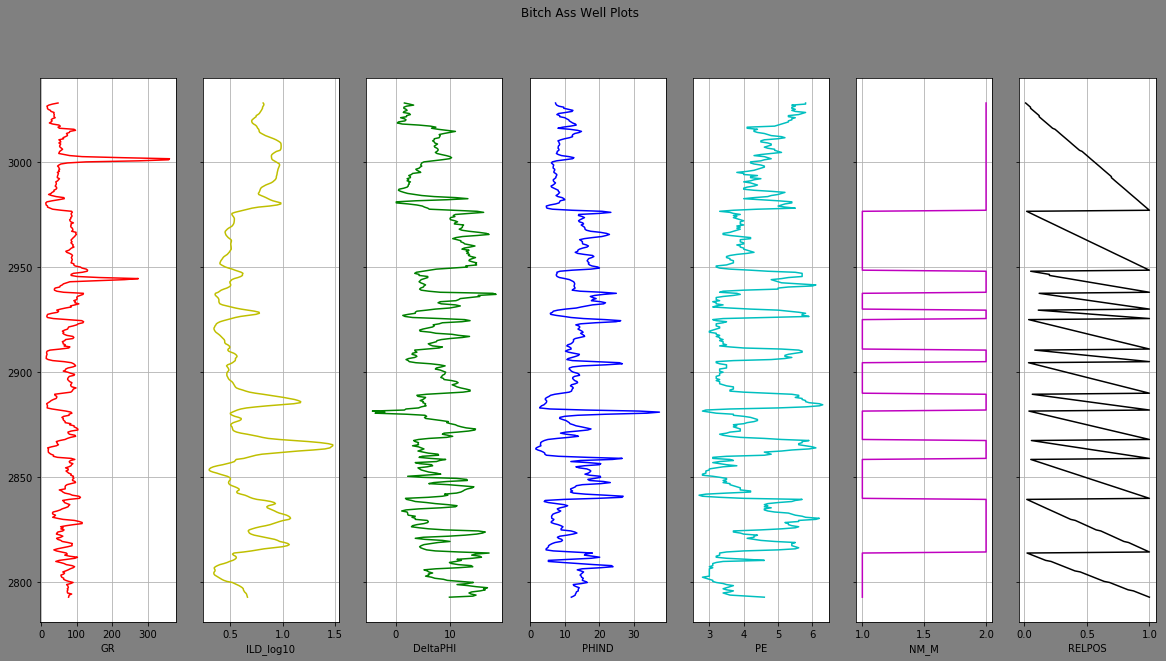

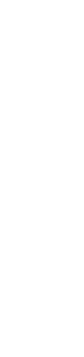

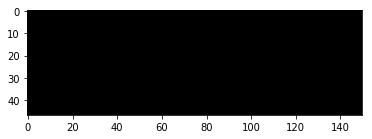

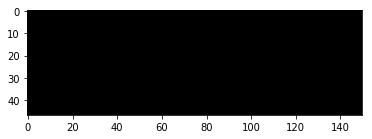

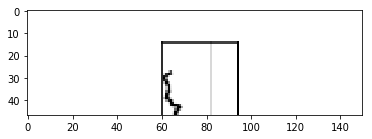

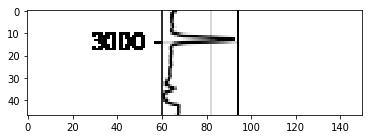

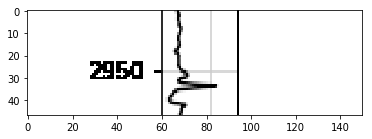

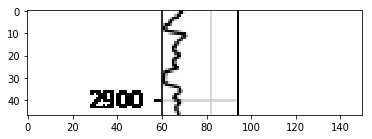

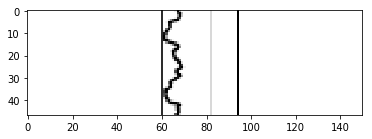

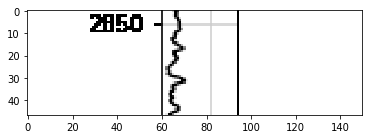

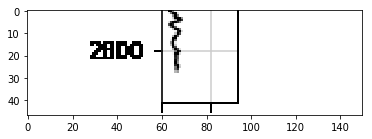

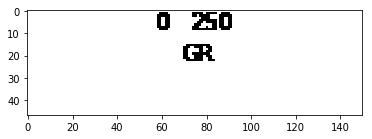

In [157]:
logchunks(shrimplin, 'GR')